In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

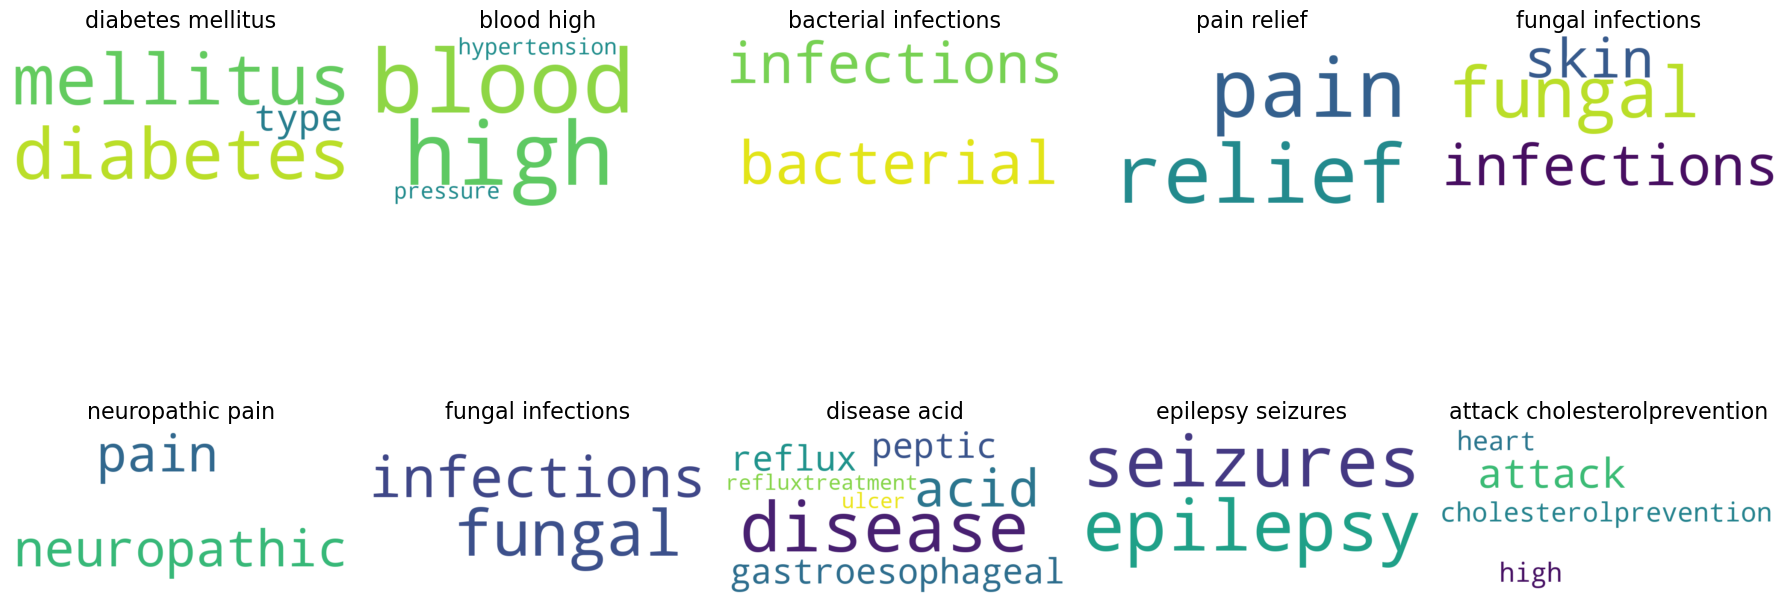

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the dataset with community labels
data = pd.read_csv('data_with_communities.csv')

# Get the top 10 communities by document count
top_communities = data['Community'].value_counts().head(10).index

# Function to calculate TF-IDF for a community
def calculate_tfidf(texts):
    vectorizer = TfidfVectorizer()
    if not texts:  # Check if texts are empty
        return {}
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1
    return dict(zip(feature_names, scores))

# Function to get top N words by TF-IDF
def get_top_tfidf_words(tfidf_scores, n=2):
    if not tfidf_scores:  # Handle empty TF-IDF scores
        return ["unknown"] * n
    sorted_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
    return [word for word, score in sorted_words[:n]]

# Create a mapping for community names
community_names = {}

# Calculate TF-IDF for the top communities and rename them
for community in top_communities:
    # Filter texts for the current community
    community_texts = data[data['Community'] == community]['Uses'].dropna().tolist()
    
    # Skip empty texts
    if not community_texts:
        community_names[community] = "unknown"
        continue
    
    # Calculate TF-IDF scores
    tfidf_scores = calculate_tfidf(community_texts)
    
    # Get top 2 words by TF-IDF
    top_words = get_top_tfidf_words(tfidf_scores, n=2)
    
    # Rename community with the top 2 words
    community_names[community] = ' '.join(top_words)

# Rename the communities in the DataFrame
data['Community Name'] = data['Community'].map(community_names)

# Set up the 2x5 grid for subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()

# Generate word clouds and plot for each community
for i, community in enumerate(top_communities):
    # Filter texts for the current community
    community_texts = data[data['Community'] == community]['Uses'].dropna().tolist()
    
    # Skip empty communities
    if not community_texts:
        continue
    
    # Calculate TF-IDF scores
    tfidf_scores = calculate_tfidf(community_texts)
    
    if not tfidf_scores:
        continue  # Skip if no TF-IDF scores are available

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
    
    # Plot on the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'{community_names.get(community, "Community " + str(community))}', fontsize=16)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('community_wordclouds.png', dpi=300)
plt.show()

# # Save the updated dataset with renamed communities
# data.to_csv('data_with_renamed_communities.csv', index=False)

# # Print renamed communities
# print("Renamed Communities:")
# for community, name in community_names.items():
#     print(f"Community {community}: {name}")


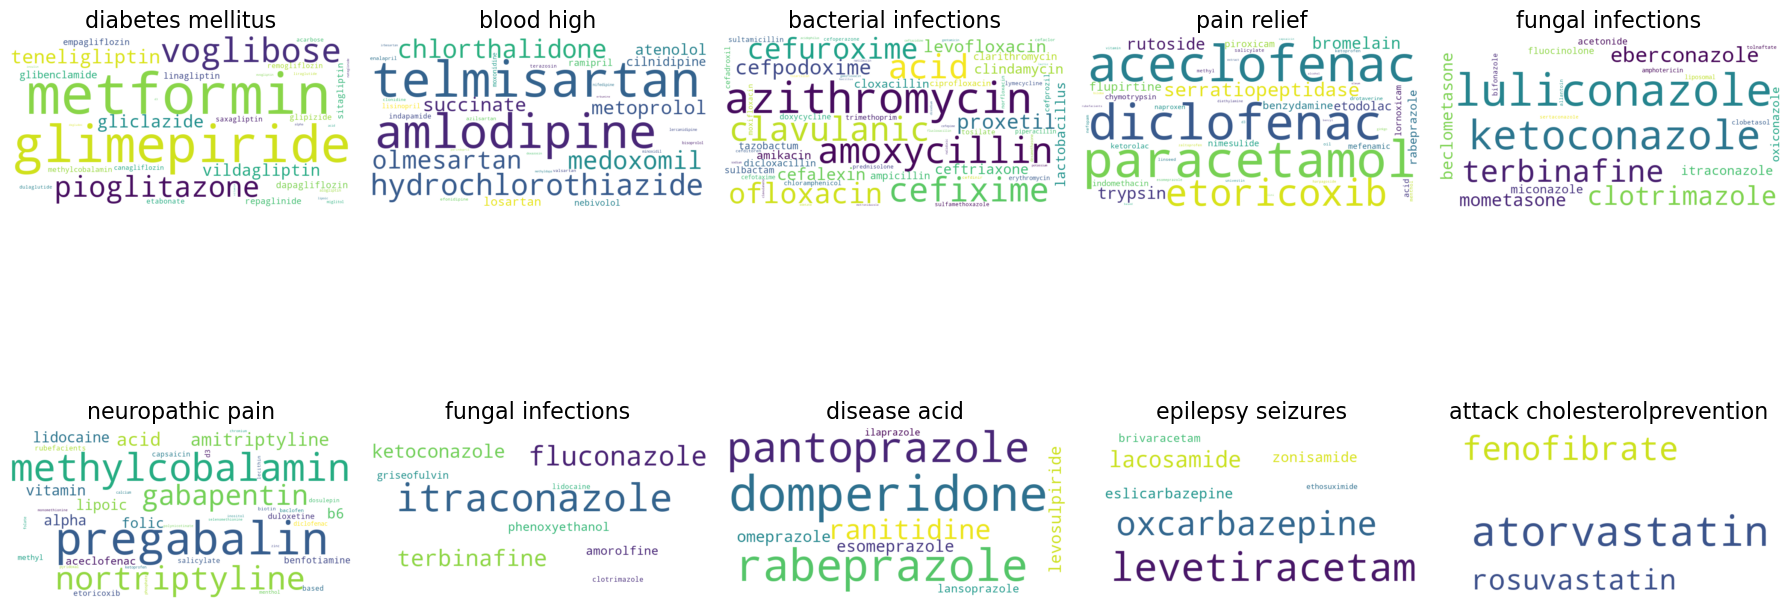

In [3]:
# Clean the Composition column
def clean_text(text):
    """
    Remove all occurrences of parentheses (and their contents) and '+' symbols from the text.
    """
    text = re.sub(r'\(.*?\)', '', text)  # Remove parentheses and their content
    text = text.replace('+', '')  # Remove '+' symbols
    return text.strip()

data['Composition'] = data['Composition'].apply(lambda x: clean_text(str(x)))

# Set up the 2x5 grid for subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()

# Generate word clouds and plot for each community
for i, community in enumerate(top_communities):
    # Filter texts for the current community
    community_texts = data[data['Community'] == community]['Composition'].dropna().tolist()
    
    # Skip empty communities
    if not community_texts:
        continue
    
    # Calculate TF-IDF scores
    tfidf_scores = calculate_tfidf(community_texts)
    
    if not tfidf_scores:
        continue  # Skip if no TF-IDF scores are available

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
    
    # Plot on the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'{community_names.get(community, "Community " + str(community))}', fontsize=16)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('community_wordclouds.png', dpi=300)
plt.show()

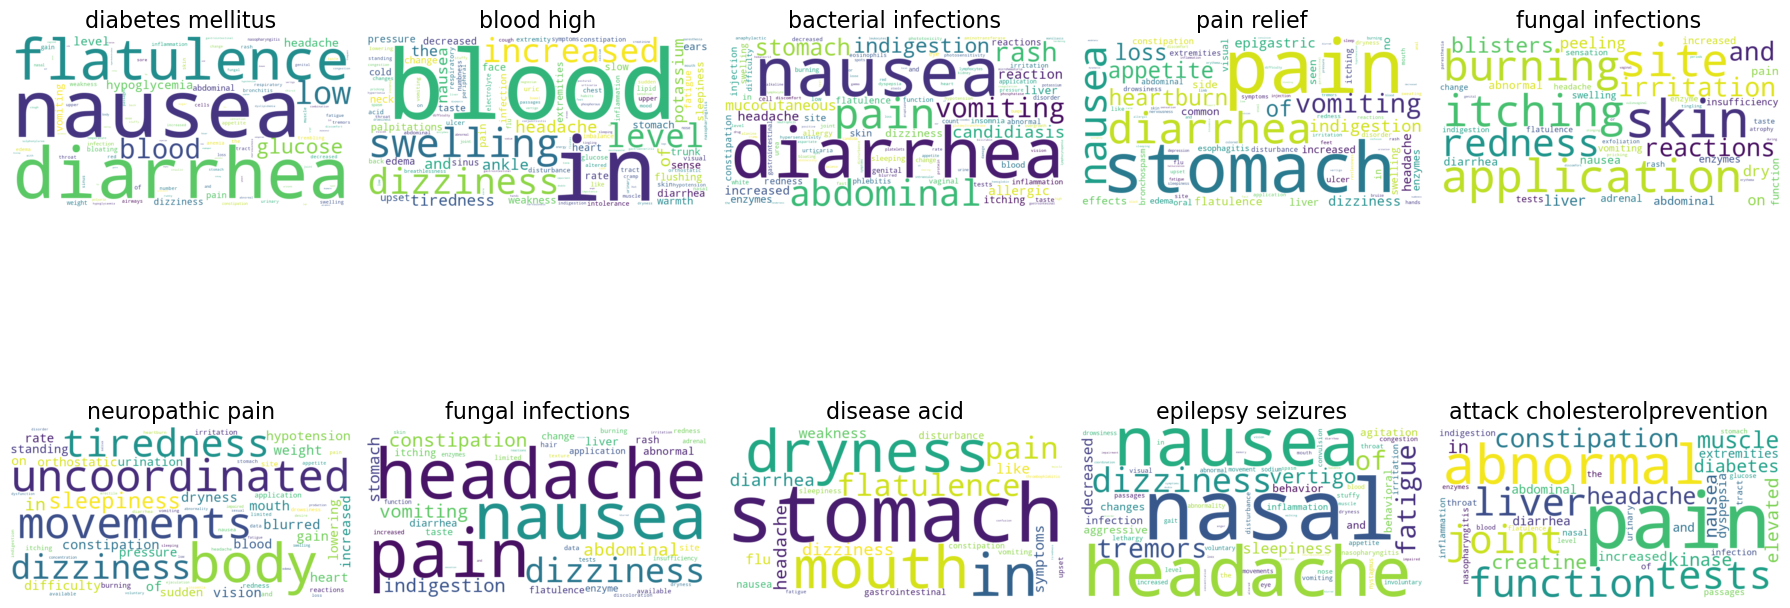

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()

for i, community in enumerate(top_communities):
    # Filter texts for the current community
    community_texts = data[data['Community'] == community]['Side_effects'].dropna().tolist()
    
    # Skip empty communities
    if not community_texts:
        continue
    
    # Calculate TF-IDF scores
    tfidf_scores = calculate_tfidf(community_texts)
    
    if not tfidf_scores:
        continue  # Skip if no TF-IDF scores are available

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
    
    # Plot on the respective subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'{community_names.get(community, "Community " + str(community))}', fontsize=16)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('community_wordclouds.png', dpi=300)
plt.show()